In [1]:
import time
start_time=time.time()

In [2]:
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np
import json
import cmasher as cmr
import seaborn as sns
import sys
import pylab as pl
import pandas as pd


from astropy.io import fits
from astropy.utils.misc import JsonCustomEncoder
import astropy.units as u
from astropy.convolution import Gaussian2DKernel, convolve_fft

from turbustat.simulator import make_ppv
from spectral_cube import SpectralCube  
import lmfit

#sys.path.insert(1, 'C:/Users/ZAINTEL2/Documents/Aeon/GitHub/PhD.Paper/py-modules')  
#from turb_utils import make_extended, make_3dfield
#import strucfunc
#import bfunc
#import bplot_mod


In [35]:
data_0020 = json.load(open("m2d_Vs_k2_0_20_32.0-cte.json"))
data_1015 = json.load(open("m2d_Vs_k_1_0_20.json"))
data_2015 = json.load(open("m2d_Vs_k_2_0_20.json"))
data_1115 = json.load(open("m2d_Vs_k2_0_20_32.0-cte.json"))
#data_2115 = json.load(open("m2d_Vs_k_2_1_15.json"))

In [36]:
pd_1015=pd.DataFrame(data_1015)
pd_2015=pd.DataFrame(data_2015)
pd_1115=pd.DataFrame(data_1115)
#pd_2115=pd.DataFrame(data_2115)

[(0.0, 3.0), Text(0, 0.5, '$ m_{2D}$ '), (0.8, 5.2), Text(0.5, 0, 'κ')]

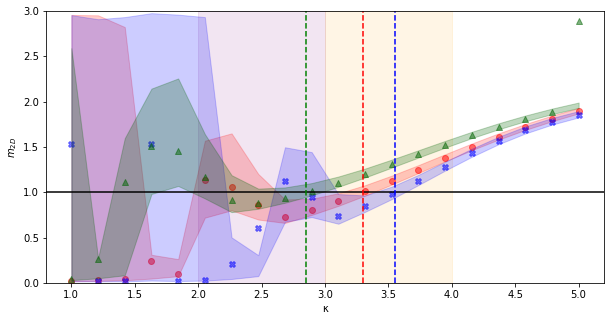

In [56]:
fig, ax = plt.subplots(figsize=(10, 5))

#sig_E=1 / k_vel = k_dens
ax.fill_between(pd_1015.iloc[0], pd_1015.iloc[1]+pd_1015.iloc[2], pd_1015.iloc[1]-pd_1015.iloc[3], alpha = 0.20, color = 'red')
for i in range(len(data_1015)):
    ax.scatter(data_1015[str(i)][0],data_1015[str(i)][1], color = 'r', marker = 'o', alpha = 0.5)
    
#sig_E=2 / k_vel = k_dens
ax.fill_between(pd_2015.iloc[0], pd_2015.iloc[1]+pd_2015.iloc[2], pd_2015.iloc[1]-pd_2015.iloc[3], alpha = 0.20, color = 'b')
for i in range(len(data_2015)):
    ax.scatter(data_2015[str(i)][0],data_2015[str(i)][1], color = 'b', marker = 'X', alpha = 0.5)

#sig_E=1 / k_vel = k_dens + 1
ax.fill_between(pd_1115.iloc[0], pd_1115.iloc[1]+pd_1115.iloc[2], pd_1115.iloc[1]-pd_1115.iloc[3], alpha = 0.25, color = 'darkgreen')
for i in range(len(data_1115)):
    ax.scatter(data_1115[str(i)][0],data_1115[str(i)][1], color = 'darkgreen', marker = '^', alpha = 0.5)
 
##sig_E=2 / k_vel = k_dens + 1
#ax.fill_between(pd_2115.iloc[0], pd_2115.iloc[1]+pd_2115.iloc[2], pd_2115.iloc[1]-pd_2115.iloc[3], alpha = 0.25, color = 'darkblue')
#for i in range(len(data_2115)):
#    ax.scatter(data_2115[str(i)][0],data_2115[str(i)][1], color = 'darkblue', marker = 'X', alpha = 0.5)
    
    
ax.fill_between(np.linspace(2,3,100), 0, 3, alpha = 0.10, color = 'purple', zorder =-5)
ax.fill_between(np.linspace(3,4,100), 0, 3, alpha = 0.10, color = 'orange', zorder =-5)
ax.hlines(1.0,0,6,linestyle='-')
ax.vlines(2.85,0,3,linestyle='--', color = 'green')
ax.vlines(3.30,0,3,linestyle='--', color = 'red')
ax.vlines(3.55,0,3,linestyle='--', color = 'blue')


#plt.title('sig_E = 2')

ax.set(
    xlim=[0.8, 5.2], ylim=[0.00,3.0],
    xlabel=r"κ", ylabel=r"$ m_{2D}$ ",
)


[(0.0, 3.0), Text(0, 0.5, '$ m_{2D}$ '), (0.8, 5.2), Text(0.5, 0, 'κ')]

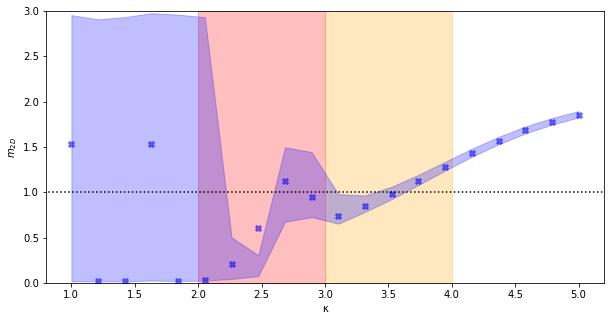

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))

#sig_E=1 / k_vel = k_dens
#ax.fill_between(pd_1015.iloc[0], pd_1015.iloc[1]+pd_1015.iloc[2], pd_1015.iloc[1]-pd_1015.iloc[3], alpha = 0.25, color = 'green')
#for i in range(len(data_1015)):
#    ax.scatter(data_1015[str(i)][0],data_1015[str(i)][1], color = 'green', marker = 'o', alpha = 0.5)
    
#sig_E=2 / k_vel = k_dens
ax.fill_between(pd_2015.iloc[0], pd_2015.iloc[1]+pd_2015.iloc[2], pd_2015.iloc[1]-pd_2015.iloc[3], alpha = 0.25, color = 'b')
for i in range(len(data_2015)):
    ax.scatter(data_2015[str(i)][0],data_2015[str(i)][1], color = 'b', marker = 'X', alpha = 0.5)

#sig_E=1 / k_vel = k_dens + 1

#ax.fill_between(pd_1115.iloc[0], pd_1115.iloc[1]+pd_1115.iloc[2], pd_1115.iloc[1]-pd_1115.iloc[3], alpha = 0.25, color = 'darkgreen')
#for i in range(len(data_1115)):
#    ax.scatter(data_1115[str(i)][0],data_1115[str(i)][1], color = 'darkgreen', marker = 'o', alpha = 0.5)
 
##sig_E=2 / k_vel = k_dens + 1
#ax.fill_between(pd_2115.iloc[0], pd_2115.iloc[1]+pd_2115.iloc[2], pd_2115.iloc[1]-pd_2115.iloc[3], alpha = 0.25, color = 'darkblue')
#for i in range(len(data_2115)):
#    ax.scatter(data_2115[str(i)][0],data_2115[str(i)][1], color = 'darkblue', marker = 'X', alpha = 0.5)
    
    
ax.fill_between(np.linspace(2,3,100), 0, 3, alpha = 0.25, color = 'r', zorder =-5)
ax.fill_between(np.linspace(3,4,100), 0, 3, alpha = 0.25, color = 'orange', zorder =-5)
ax.hlines(1.0,0,6,linestyle=':')

ax.set(
    xlim=[0.8, 5.2], ylim=[0.00,3.0],
    xlabel=r"κ", ylabel=r"$ m_{2D}$ ",
)


In [7]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 10.877143144607544 seconds ---
